In [43]:
#!/usr/bin/env python3

import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
# sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/data')
# print(sys.path)

# Import the data
df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
print(df)

    Unnamed: 0   Gen   Price     Mismatch  Dividends  RDividend  \
0            0   0.0  107.83  1554.981241   0.004072  -0.189624   
1            1   1.0  107.87  2549.123335   0.004049  -0.911918   
2            2   2.0  107.38 -2186.353648   0.004015  -1.319086   
3            3   3.0  106.43 -1770.230513   0.003995  -0.803532   
4            4   4.0  105.22   521.539763   0.003960  -1.391163   
..         ...   ...     ...          ...        ...        ...   
74          74  74.0  112.02   736.574529   0.004296  -0.694238   
75          75  75.0  112.23  -384.478197   0.004269  -0.974174   
76          76  76.0  111.86 -2447.988261   0.004246  -0.879476   
77          77  77.0  110.81  -291.182119   0.004240  -0.214263   
78          78  78.0  109.69  2355.594833   0.004214  -0.990005   

           Volume  Rep        Pos+  Pos-  ...     TimeD     TimeE     TimeF  \
0   277212.596835  0.0  25000000.0   0.0  ...  0.000103  0.000977  0.000168   
1   132474.112520  0.0  25000000.0   

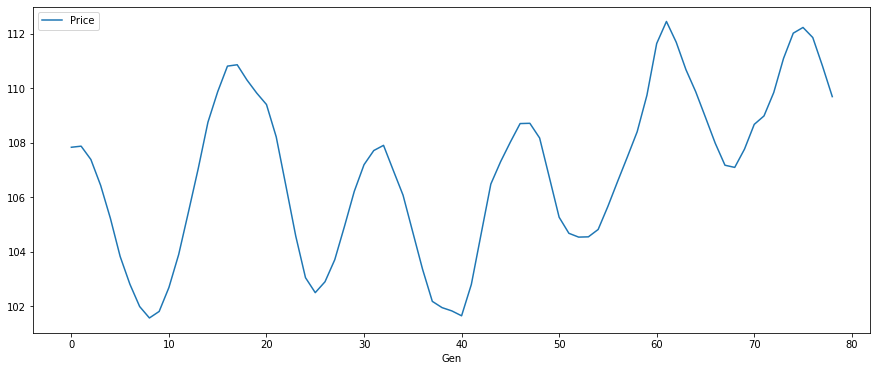

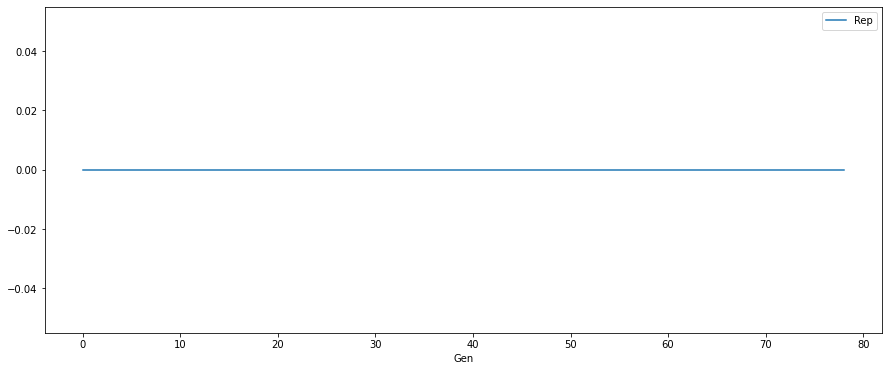

In [44]:

df.plot(x="Gen", y = ["Price"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ['Rep'],
        kind="line", figsize=(15, 6))
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


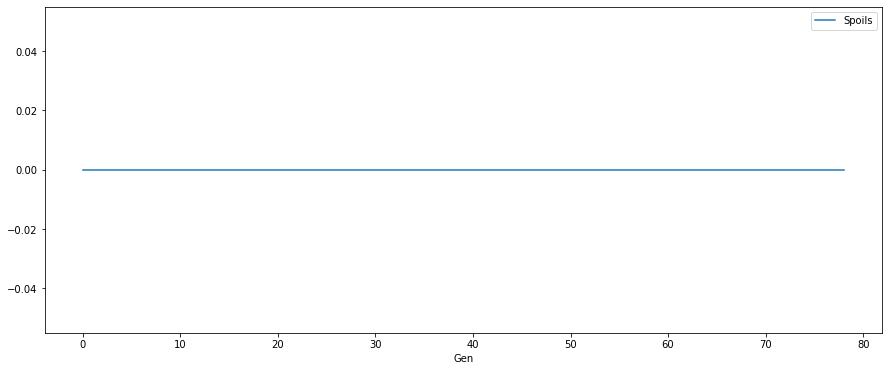

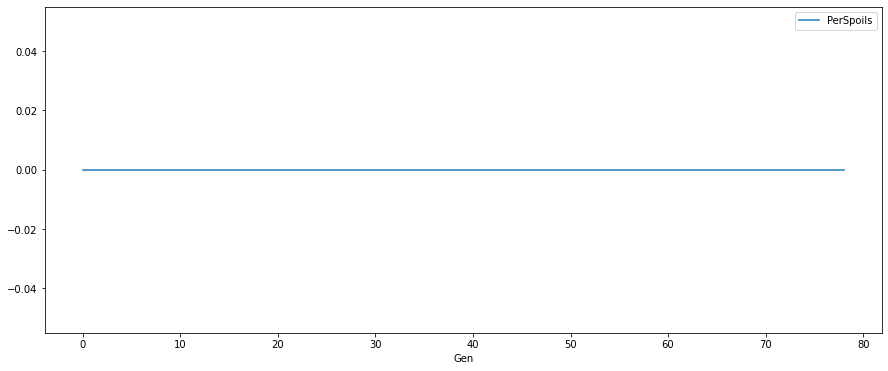

In [45]:

df['AbsSpoils'] = [abs(ele) for ele in df['Spoils']]
df['LogAbsSpoils'] = np.log(df['AbsSpoils'])

df.plot(x="Gen", y = ['Spoils'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ['PerSpoils'],
        kind="line", figsize=(15, 6))
plt.show()

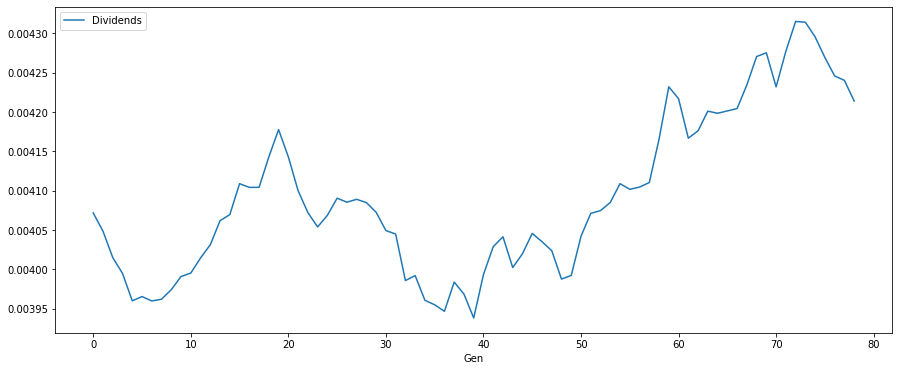

In [46]:
df.plot(x="Gen", y = ["Dividends"],
        kind="line", figsize=(15, 6))
plt.show()



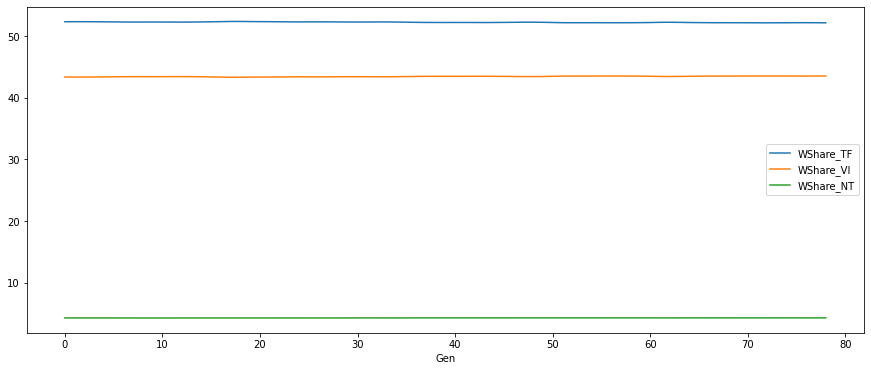

In [47]:
df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()




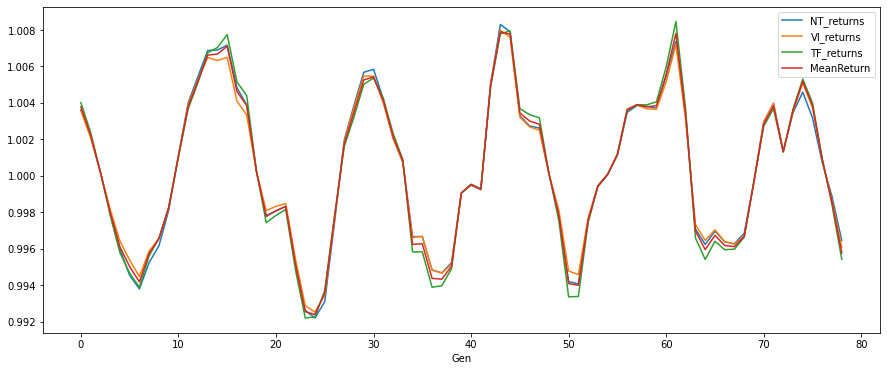

In [48]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns", 'MeanReturn'],
        kind="line", figsize=(15, 6))
plt.show()

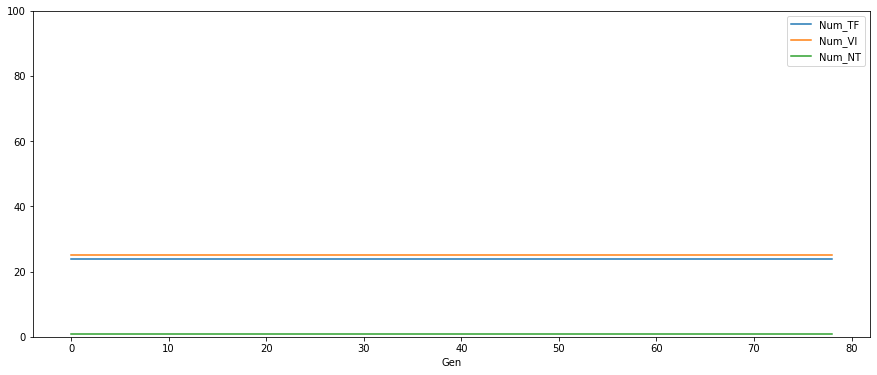

In [49]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

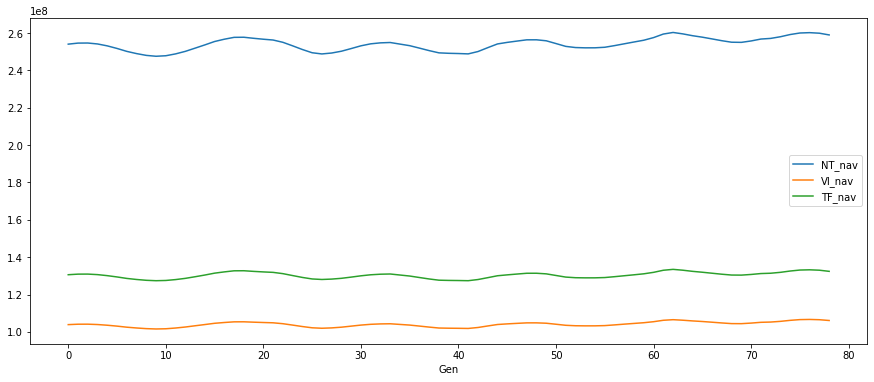

In [50]:
''' NAV '''
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


1.0002778455705572


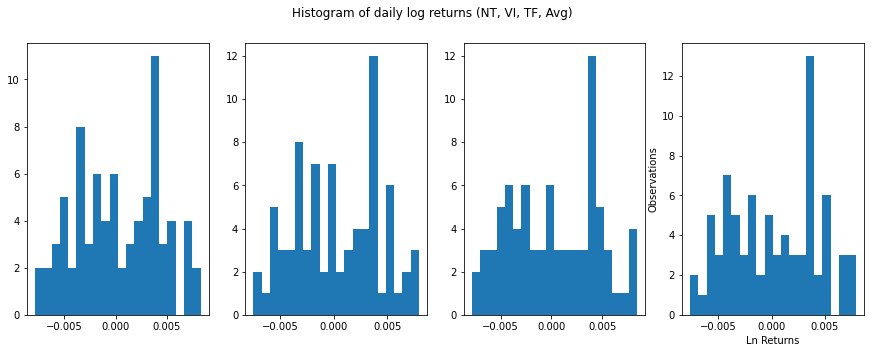

In [51]:
''' Histogram of the daily strategy returns '''

print(np.mean(df['MeanReturn'])) # Daily







fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of daily log returns (NT, VI, TF, Avg)')
ax1.hist(np.log(df['NT_returns']), bins = 20)
ax2.hist(np.log(df['VI_returns']), bins = 20)
ax3.hist(np.log(df['TF_returns']), bins = 20)
ax4.hist(np.log(df['MeanReturn']), bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Ln Returns')
plt.show()

# TODO: add monthly returns





0.006483465955349341
0.0
0.0024409252456355536
0.0013013134370120322


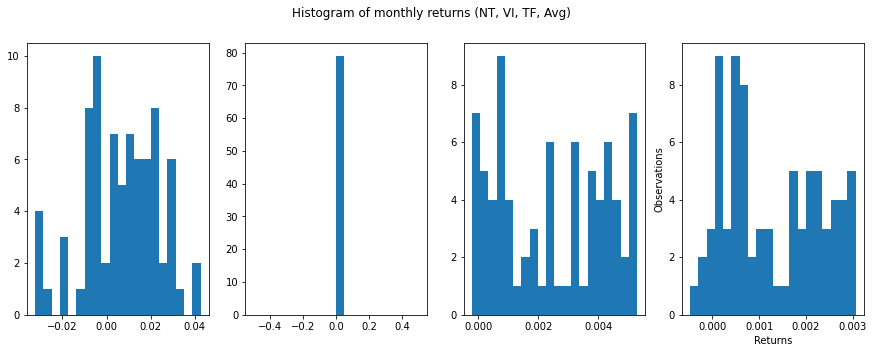

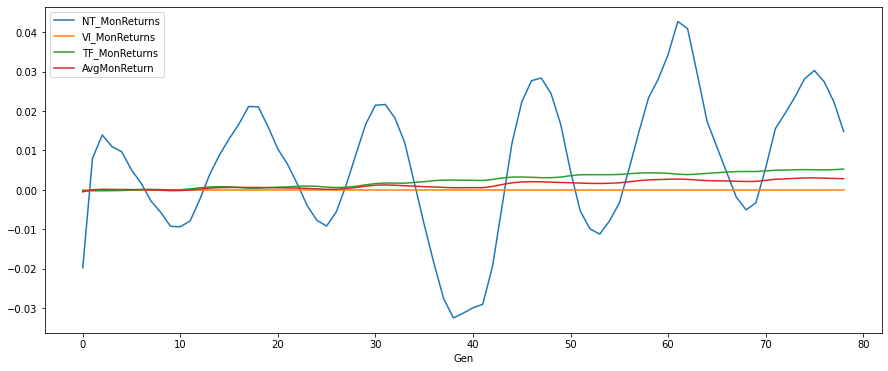

In [52]:
print(df['NT_MonReturns'].mean())
print(df['VI_MonReturns'].mean())
print(df['TF_MonReturns'].mean())
print(df['AvgMonReturn'].mean())

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of monthly returns (NT, VI, TF, Avg)')
ax1.hist(df['NT_MonReturns'], bins = 20)
ax2.hist(df['VI_MonReturns'], bins = 20)
ax3.hist(df['TF_MonReturns'], bins = 20)
ax4.hist(df['AvgMonReturn'], bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Returns')
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/hist_returns.png')

plt.show()

''' Evolution of returns over time '''
df.plot(x="Gen", y = ["NT_MonReturns", "VI_MonReturns", "TF_MonReturns", "AvgMonReturn"],
        kind="line", figsize=(15, 6))
plt.show()




In [53]:
''' Monthly strategy returns '''







' Monthly strategy returns '

Bin